# Word Detection Models

# 1. PDF Pre-processing

# 1.1. Working on converting pdfs to images

In [1]:
import cv2
import pdf2image
from matplotlib import pyplot as plt

In [18]:
import os

pdfs = os.listdir('pdfs')

In [19]:
pdfs

['.file', 'ubuntu-book.pdf', 'justforfun_persian.pdf']

## 1.2. Making an array of images from PDF files

If you get any errors at this post, please make sure `poppler` is installed on your computer.

In [20]:
from pdf2image import convert_from_path

images = []

for pdf in pdfs:
    try:
        pages = convert_from_path(f'pdfs/{pdf}')
        images.extend(pages)
    except Exception as e:
        print(e)

Unable to get page count.
Syntax Error: Document stream is empty



## 1.3. Converting PIL images to numpy arrays

This is because we need CV2 images for lighter and faster inference. 

In [5]:
import numpy as np

In [21]:
cv_images = []

for image in images:
    cv_images.append(np.array(image))

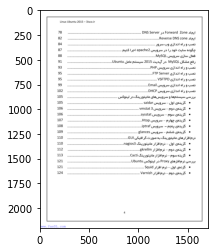

In [22]:
%matplotlib inline

plt.imshow(cv_images[3])

## 1.4. Saving images in desired format (with some randomization)

In [23]:
from uuid import uuid4 

for image in cv_images:
    cv2.imwrite(f'images/{uuid4()}.jpg', image)

## 1.5. Working on images to be suitable for YOLOv5 training

In [9]:
import random

random.seed()

In [24]:
images = os.listdir('images')

In [25]:
image = cv2.imread(f'images/{images[45]}')
image = cv2.bitwise_not(image)

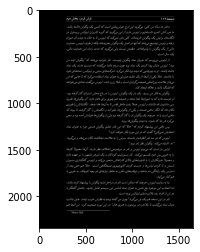

In [26]:
%matplotlib inline

plt.imshow(image)

## 1.6. Picking some random images, make them greyscale, then bitwise_not() them

In [13]:
random_images = []

for i in range(25):
    temp = cv2.imread('images/' + images[random.randrange(25)])
    temp = cv2.cvtColor(temp, cv2.COLOR_BGR2GRAY)
    temp = cv2.bitwise_not(temp)
    random_images.append(temp)

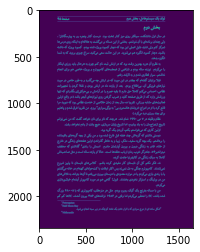

In [16]:
%matplotlib inline

plt.imshow(random_images[1])

## 1.7. Saving images to dataset directory (not available on git)

In [17]:
from uuid import uuid4 

for image in random_images:
    cv2.imwrite(f'{uuid4()}.jpg', image)

## 2. Starting Inference